C:\Users\oftuadmin\AppData\Local\Temp\ipykernel_19508\3715808864.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year'] = train_data['Month'].dt.year
C:\Users\oftuadmin\AppData\Local\Temp\ipykernel_19508\3715808864.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Month'] = train_data['Month'].dt.month
C:\Users\oftuadmin\AppData\Local\Temp\ipykernel_19508\3715808864.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Среднеквадратичная ошибка LightGBM: 74.38


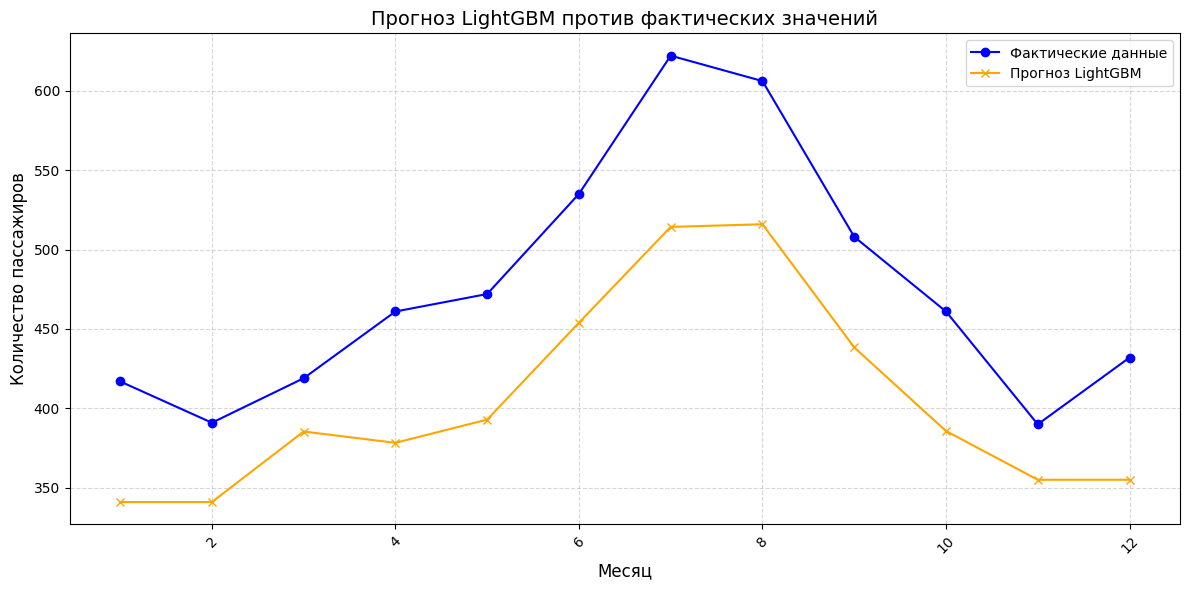

In [15]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('AirPassengers.csv')  # Замените на путь к вашему файлу
data["Month"] = pd.to_datetime(data["Month"]).dt.to_period("M").dt.to_timestamp()

# Определяем последний год для тестовой выборки
last_year = data["Month"].dt.year.max()

# Разделение данных: тренировочные и тестовые
train_data = data[data["Month"].dt.year < last_year]
test_data = data[data["Month"].dt.year == last_year]

# Создание временных признаков
train_data['Year'] = train_data['Month'].dt.year
train_data['Month'] = train_data['Month'].dt.month

test_data['Year'] = test_data['Month'].dt.year
test_data['Month'] = test_data['Month'].dt.month

# Создание циклических признаков
train_data['sin_month'] = np.sin(2 * np.pi * train_data['Month'] / 12)*0
train_data['cos_month'] = np.cos(2 * np.pi * train_data['Month'] / 12)*0

test_data['sin_month'] = np.sin(2 * np.pi * test_data['Month'] / 12)*0
test_data['cos_month'] = np.cos(2 * np.pi * test_data['Month'] / 12)*0

# Определение признаков и целевой переменной
X_train = train_data[['Year', 'Month']]
y_train = train_data['#Passengers']
X_test = test_data[['Year', 'Month']]
y_test = test_data['#Passengers']

# Создание и обучение модели LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=1000, max_depth=8, learning_rate=0.1, num_leaves=10, random_state=42)
lgb_model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = lgb_model.predict(X_test)

# Вычисление RMSE для LightGBM
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Среднеквадратичная ошибка LightGBM: {lgb_rmse:.2f}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(test_data['Month'], y_test, label='Фактические данные', color='blue', marker='o')
plt.plot(test_data['Month'], y_pred, label='Прогноз LightGBM', color='orange', marker='x')
plt.title('Прогноз LightGBM против фактических значений', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()
